In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from time_contracts import *
from itertools import product
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns
from matplotlib.patches import Rectangle

In [2]:

G_cf, W_cf = time_var_contracts(my_print=False, c2=0.1, g_const=False)
G_ct, W_ct = time_var_contracts(my_print=False, c2=0.1, g_const=True)

# Error
print("Error in G: ", np.linalg.norm(G_cf - G_ct)/ np.linalg.norm(G_cf))
print("Error in W: ", np.linalg.norm(W_cf - W_ct)/ np.linalg.norm(W_cf))

Error in G:  2.3710517113115047e-06
Error in W:  2.0438948240646377e-05


In [3]:

psi = 0.49
alpha_d = 11 
laxes = [1,2,3]
types = [1/1.25, 1, 1/0.75]
G_c, W_c = time_var_contracts(my_print=False, thetas=types, laxes = laxes, c2=0.1, g_const=False)
print("G_c")
print(G_c)
print("W_c")
print(W_c)

G_c
[[0.1        0.2        0.3       ]
 [0.15389999 0.26999489 0.36999296]
 [0.1539     0.29834872 0.4099814 ]]
W_c
[[-0.         -0.         -0.        ]
 [ 5.38999922  6.99948936  6.99929562]
 [ 5.38999994 10.77999897 12.33108788]]


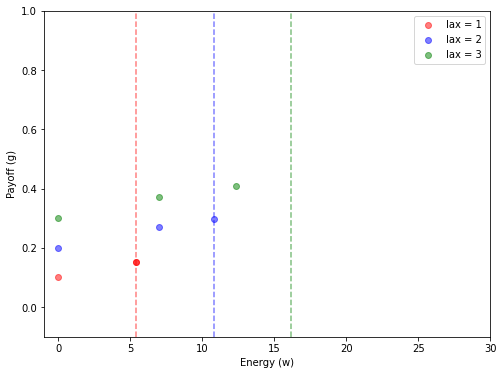

In [4]:
G = G_c
W = W_c
fig1 = plt.figure(figsize = (8, 6))
ax1 = fig1.add_subplot(1,1,1)
colors = ["red", "blue", "green", "orange", "purple"]
ax1.set_ylabel("Payoff (g)")
for i in range(len(laxes)):
    ax1.scatter(W[:,i],G[:,i], alpha = 0.5, color=colors[i], label = f"lax = {laxes[i]}")
    ax1.vlines(laxes[i]*alpha_d*psi, -0.1, 1, color=colors[i], ls = "--", alpha=0.5)
ax1.set_xlim([-1, 30]) 
ax1.set_ylim([-0.1, 1])
ax1.set_xlabel("Energy (w)")
ax1.legend()

In [5]:
ev_utility = np.zeros((len(types), len(laxes), len(types), len(laxes)))

for i, truetype in enumerate(types):
    for j, truelax in enumerate(laxes):
        for k, type in enumerate(types):
            for l, lax in enumerate(laxes):
                ev_utility[i,j,k,l] = u_ev(G[k,l], W[k,l], truetype, truelax, c2=0.1) 

In [6]:
print(np.min(ev_utility))
print(np.max(ev_utility))

-0.2134750004901392
0.2174982405607929


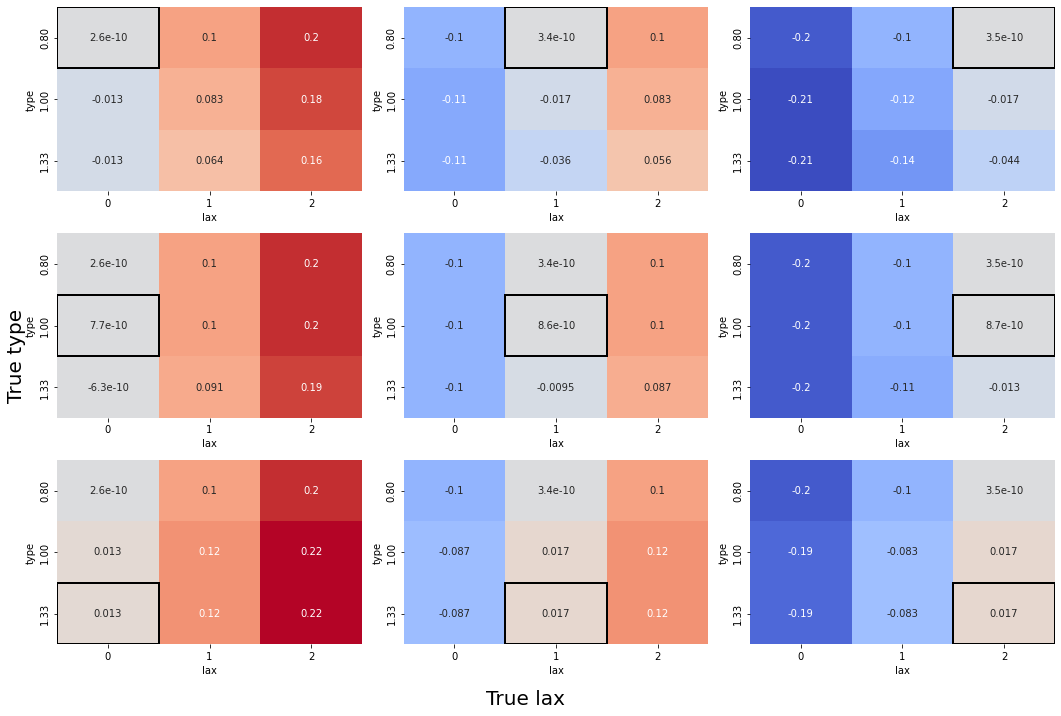

In [7]:
fig1 = plt.figure(figsize = (15, 10))
axs = fig1.subplots(len(types), len(laxes))
vmin = np.min(ev_utility)
vmax = np.max(ev_utility)

for i, truetype in enumerate(types):
    for j, truelax in enumerate(laxes):
        sns.heatmap(ev_utility[i,j,:,:], ax=axs[i,j], vmin = vmin, vmax = vmax, cbar=False, annot=True, cmap="coolwarm")
        axs[i,j].add_patch(Rectangle((j,i), 1, 1, fill=False, edgecolor='black', lw=2))
        axs[i,j].set_xlabel("lax")
        axs[i,j].set_ylabel("type")
        xticks = axs[i,j].get_yticks()
        axs[i,j].set_yticks(xticks)
        axs[i,j].set_yticklabels([f"{x:.2f}" for x in types])
fig1.supxlabel("True lax", fontsize = 20)
fig1.supylabel("True type", fontsize = 20)
fig1.tight_layout()